In [1]:
!pip install git+https://github.com/manmeet3591/xdownscale.git

  Cloning https://github.com/manmeet3591/xdownscale.git to /tmp/pip-req-build-d4nt8lf5
  Running command git clone --filter=blob:none --quiet https://github.com/manmeet3591/xdownscale.git /tmp/pip-req-build-d4nt8lf5
  Resolved https://github.com/manmeet3591/xdownscale.git to commit a5cf2239f4c230914cb183dd4c0cd7603cb00bff
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:

[0] loss: 0.6663
[10] loss: 0.1671
[20] loss: 0.1135
[30] loss: 0.0880
[40] loss: 0.0890
[50] loss: 0.0821
[60] loss: 0.0752
[70] loss: 0.0616
[80] loss: 0.0416
[90] loss: 0.0269


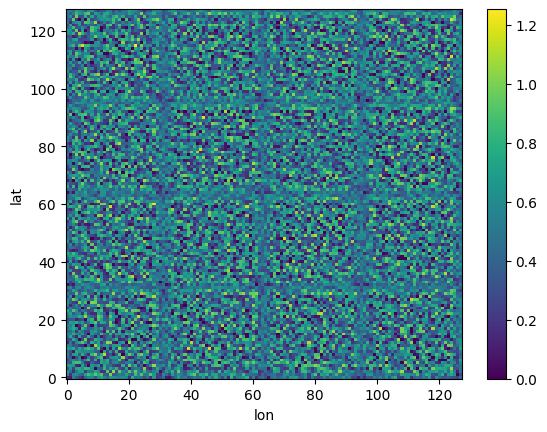

In [2]:
import xarray as xr
import numpy as np
from xdownscale import Downscaler

# Create dummy data for test
x = np.random.rand(128, 128).astype(np.float32)
y = (x + np.random.normal(0, 0.01, size=x.shape)).astype(np.float32)

input_da = xr.DataArray(x, dims=["lat", "lon"])
target_da = xr.DataArray(y, dims=["lat", "lon"])

# Use FSRCNN instead of default SRCNN
ds = Downscaler(input_da, target_da, model_name="fsrcnn")

# Predict on new input
result = ds.predict(input_da)
result.plot()